In [2]:
# Just another day in the life of a data analyst...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

# What are the typical libraries we import?
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
fifa21_male2 = pd.read_csv('fifa21_male2.csv')
fifa21_male2.shape

C:\Users\RaulR\AppData\Local\Temp\ipykernel_32876\4119570986.py:1: DtypeWarning: Columns (78) have mixed types. Specify dtype option on import or set low_memory=False.
  fifa21_male2 = pd.read_csv('fifa21_male2.csv')


(17125, 107)

Cleaning the dataframe: checking the columns and their types, checking for the nans.

In [4]:
fifa21_male2.columns

Index(['ID', 'Name', 'Age', 'OVA', 'Nationality', 'Club', 'BOV', 'BP',
       'Position', 'Player Photo',
       ...
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'GK', 'Gender'],
      dtype='object', length=107)

In [5]:
fifa21_male2_numeric = fifa21_male2.select_dtypes(include='number') 
fifa21_male2_numeric.head()

,ID,Age,OVA,BOV,POT,Growth,Attacking,Crossing,Finishing,Heading Accuracy,...,GK Positioning,GK Reflexes,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY
0,2,33,69,71,69,0,313,75,50,59,...,10,12,1929,408,71,59,70,71,68,69
1,16,37,71,70,71,0,337,68,64,61,...,11,11,1906,385,53,69,73,69,58,63
2,27,33,71,71,71,0,337,80,64,41,...,16,7,1770,354,45,68,76,77,36,52
3,36,36,68,70,82,14,264,54,70,60,...,21,21,1348,369,61,66,66,69,47,60
4,41,36,81,82,81,0,367,75,69,54,...,13,7,2014,420,58,70,85,85,63,59


In [6]:
fifa21_male2_numeric.isna().sum()

ID                    0
Age                   0
OVA                   0
BOV                   0
POT                   0
Growth                0
Attacking             0
Crossing              0
Finishing             0
Heading Accuracy      0
Short Passing         0
Volleys              58
Skill                 0
Dribbling             0
Curve                58
FK Accuracy           0
Long Passing          0
Ball Control          0
Movement              0
Acceleration          0
Sprint Speed          0
Agility              58
Reactions             0
Balance              58
Power                 0
Shot Power            0
Jumping              58
Stamina               0
Strength              0
Long Shots            0
Mentality             0
Aggression            0
Interceptions         7
Positioning           7
Vision               58
Penalties             0
Composure           423
Defending             0
Marking               0
Standing Tackle       0
Sliding Tackle       58
Goalkeeping     

In [7]:
fifa21_male2_numeric['Vision'].replace({np.NaN:fifa21_male2_numeric['Vision'].mean()},inplace=True)
fifa21_male2_numeric['Composure'].replace({np.NaN:fifa21_male2_numeric['Composure'].mean()},inplace=True)
fifa21_male2_numeric['Sliding Tackle'].replace({np.NaN:fifa21_male2_numeric['Sliding Tackle'].mean()},inplace=True)
fifa21_male2_numeric['Positioning'].replace({np.NaN:fifa21_male2_numeric['Positioning'].mean()},inplace=True)
fifa21_male2_numeric['Interceptions'].replace({np.NaN:fifa21_male2_numeric['Interceptions'].mean()},inplace=True)
fifa21_male2_numeric['Jumping'].replace({np.NaN:fifa21_male2_numeric['Jumping'].mean()},inplace=True)

In [8]:
fifa21_male2_numeric.isna().sum()

ID                   0
Age                  0
OVA                  0
BOV                  0
POT                  0
Growth               0
Attacking            0
Crossing             0
Finishing            0
Heading Accuracy     0
Short Passing        0
Volleys             58
Skill                0
Dribbling            0
Curve               58
FK Accuracy          0
Long Passing         0
Ball Control         0
Movement             0
Acceleration         0
Sprint Speed         0
Agility             58
Reactions            0
Balance             58
Power                0
Shot Power           0
Jumping              0
Stamina              0
Strength             0
Long Shots           0
Mentality            0
Aggression           0
Interceptions        0
Positioning          0
Vision               0
Penalties            0
Composure            0
Defending            0
Marking              0
Standing Tackle      0
Sliding Tackle       0
Goalkeeping          0
GK Diving            0
GK Handling

In [9]:
round(fifa21_male2_numeric.describe(), 2)

,ID,Age,OVA,BOV,POT,Growth,Attacking,Crossing,Finishing,Heading Accuracy,...,GK Positioning,GK Reflexes,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY
count,17125.00,17125.00,17125.00,17125.00,17125.00,17125.00,17125.00,17125.00,17125.00,17125.00,...,17125.00,17125.00,17125.00,17125.00,17125.00,17125.00,17125.00,17125.00,17125.00,17125.00
mean,219388.72,25.27,66.97,67.90,72.49,5.52,258.54,51.62,47.96,53.60,...,15.51,15.74,1631.26,361.37,68.09,54.97,58.93,64.21,50.27,64.91
std,37499.20,4.94,6.86,6.64,5.77,5.79,72.26,17.88,19.39,16.95,...,16.41,17.13,260.36,40.25,11.15,13.88,10.19,9.83,16.85,9.66
min,2.00,16.00,38.00,42.00,47.00,-1.00,33.00,6.00,3.00,5.00,...,1.00,1.00,731.00,228.00,25.00,16.00,25.00,28.00,12.00,27.00
25%,204082.00,21.00,62.00,64.00,69.00,0.00,232.00,41.00,33.00,46.00,...,8.00,8.00,1492.00,333.00,62.00,46.00,52.00,59.00,35.00,59.00
50%,228961.00,25.00,67.00,68.00,72.00,4.00,271.00,56.00,52.00,57.00,...,11.00,11.00,1659.00,362.00,69.00,58.00,60.00,65.00,53.00,66.00
75%,243911.00,29.00,72.00,72.00,76.00,9.00,306.00,65.00,64.00,65.00,...,14.00,14.00,1812.00,390.00,75.00,65.00,66.00,71.00,64.00,72.00
max,259105.00,53.00,93.00,93.00,95.00,26.00,437.00,94.00,95.00,93.00,...,93.00,90.00,2316.00,498.00,96.00,93.00,93.00,95.00,91.00,93.00


In [10]:
df_age_total_base = pd.DataFrame([fifa21_male2_numeric['Age']]+
                                 [fifa21_male2_numeric['Total Stats']] +
                                 [fifa21_male2_numeric['OVA']] + 
                                 [fifa21_male2_numeric['POT']] )
df_age_total_base = df_age_total_base.T
df_age_total_base.describe()

,Age,Total Stats,OVA,POT
count,17125.000000,17125.000000,17125.000000,17125.000000
mean,25.272934,1631.256175,66.965022,72.489810
std,4.942665,260.357024,6.864329,5.769949
min,16.000000,731.000000,38.000000,47.000000
25%,21.000000,1492.000000,62.000000,69.000000
50%,25.000000,1659.000000,67.000000,72.000000
75%,29.000000,1812.000000,72.000000,76.000000
max,53.000000,2316.000000,93.000000,95.000000


In [11]:
fifa21_male2_categorical = fifa21_male2.select_dtypes(include='object')
fifa21_male2_categorical.head()

,Name,Nationality,Club,BP,Position,Player Photo,Club Logo,Flag Photo,Team & Contract,Height,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,G. Pasquale,Italy,Udinese,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,Udinese 2008 ~ 2016,"6'0""",...,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,Luis García,Spain,KAS Eupen,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,KAS Eupen 2014 ~ 2019,"5'10""",...,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,J. Cole,England,Coventry City,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,Coventry City 2016 ~ 2020,"5'9""",...,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,D. Yorke,Trinidad &amp; Tobago,Sunderland,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,Sunderland 2009,"5'11""",...,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,Iniesta,Spain,Vissel Kobe,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,Vissel Kobe 2018 ~ 2021,"5'7""",...,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male


In [12]:
fifa21_male2_categorical.columns

Index(['Name', 'Nationality', 'Club', 'BP', 'Position', 'Player Photo',
       'Club Logo', 'Flag Photo', 'Team & Contract', 'Height', 'Weight',
       'foot', 'Joined', 'Loan Date End', 'Value', 'Wage', 'Release Clause',
       'Contract', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'Hits', 'LS', 'ST', 'RS',
       'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM',
       'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB',
       'RCB', 'RB', 'GK', 'Gender'],
      dtype='object')

In [13]:
fifa21_male2_categorical.drop(columns=['Joined', 'Loan Date End','Player Photo',
       'Team & Contract', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'Hits', 'LS', 'ST', 'RS',
       'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM',
       'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB',
       'RCB', 'RB', 'GK', 'Gender','Club Logo','Flag Photo', 'Contract', 'Release Clause'],inplace=True)
fifa21_male2_categorical

,Name,Nationality,Club,BP,Position,Height,Weight,foot,Value,Wage
0,G. Pasquale,Italy,Udinese,LWB,LM,"6'0""",181lbs,Left,€625K,€7K
1,Luis García,Spain,KAS Eupen,CM,CM CAM CDM,"5'10""",143lbs,Right,€600K,€7K
2,J. Cole,England,Coventry City,CAM,CAM RM RW LM,"5'9""",161lbs,Right,€1.1M,€15K
3,D. Yorke,Trinidad &amp; Tobago,Sunderland,ST,NaN,"5'11""",165lbs,Right,€0,€0
4,Iniesta,Spain,Vissel Kobe,CAM,CM CAM,"5'7""",150lbs,Right,€5.5M,€12K
...,...,...,...,...,...,...,...,...,...,...
17120,A. Medioub,France,CD Tondela,CB,CB,"6'6""",165lbs,Right,€550K,€2K
17121,W. Rickard,Wales,Burnley,CAM,CAM CM,"5'10""",170lbs,Right,€130K,€3K
17122,C. Barrett,England,Burnley,RB,RB,"5'9""",154lbs,Right,€130K,€2K
17123,J. Gazibegović,Bosnia Herzegovina,SK Sturm Graz,RB,RB LB,"5'9""",148lbs,Right,€475K,€3K


In [14]:
New_Df_fifa1 = fifa21_male2_categorical.join(df_age_total_base)


In [15]:
# changing the column order
New_Df_fifa1 = New_Df_fifa1[['Name', 'Nationality', 'Club', 'Age','BP', 'Position','Total Stats', 'OVA', 'POT', 'Height', 'Weight','foot', 'Value', 'Wage',]]

In [16]:
New_Df_fifa1

,Name,Nationality,Club,Age,BP,Position,Total Stats,OVA,POT,Height,Weight,foot,Value,Wage
0,G. Pasquale,Italy,Udinese,33,LWB,LM,1929,69,69,"6'0""",181lbs,Left,€625K,€7K
1,Luis García,Spain,KAS Eupen,37,CM,CM CAM CDM,1906,71,71,"5'10""",143lbs,Right,€600K,€7K
2,J. Cole,England,Coventry City,33,CAM,CAM RM RW LM,1770,71,71,"5'9""",161lbs,Right,€1.1M,€15K
3,D. Yorke,Trinidad &amp; Tobago,Sunderland,36,ST,NaN,1348,68,82,"5'11""",165lbs,Right,€0,€0
4,Iniesta,Spain,Vissel Kobe,36,CAM,CM CAM,2014,81,81,"5'7""",150lbs,Right,€5.5M,€12K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,A. Medioub,France,CD Tondela,22,CB,CB,1367,64,69,"6'6""",165lbs,Right,€550K,€2K
17121,W. Rickard,Wales,Burnley,18,CAM,CAM CM,1529,56,66,"5'10""",170lbs,Right,€130K,€3K
17122,C. Barrett,England,Burnley,18,RB,RB,1430,56,67,"5'9""",154lbs,Right,€130K,€2K
17123,J. Gazibegović,Bosnia Herzegovina,SK Sturm Graz,20,RB,RB LB,1579,62,73,"5'9""",148lbs,Right,€475K,€3K


In [17]:
New_Df_fifa1['Height cleaned'] = New_Df_fifa1['Height'].str.replace('"','').str.split("'")
New_Df_fifa1['Height cleaned']

0         [6, 0]
1        [5, 10]
2         [5, 9]
3        [5, 11]
4         [5, 7]
          ...   
17120     [6, 6]
17121    [5, 10]
17122     [5, 9]
17123     [5, 9]
17124    [5, 10]
Name: Height cleaned, Length: 17125, dtype: object

In [18]:
def feet_to_cm(height):
    feet, inches = height
    return int(feet) * 30.48 + int(inches) * 2.54

# Apply the function to the DataFrame column and create a new column with the result
New_Df_fifa1['Height (cm)'] = New_Df_fifa1['Height cleaned'].apply(feet_to_cm)



In [19]:
useless_columns =['Height', 'Height cleaned']
New_Df_fifa1.drop(useless_columns, axis=1, inplace=True)


In [20]:
New_Df_fifa1

,Name,Nationality,Club,Age,BP,Position,Total Stats,OVA,POT,Weight,foot,Value,Wage,Height (cm)
0,G. Pasquale,Italy,Udinese,33,LWB,LM,1929,69,69,181lbs,Left,€625K,€7K,182.88
1,Luis García,Spain,KAS Eupen,37,CM,CM CAM CDM,1906,71,71,143lbs,Right,€600K,€7K,177.80
2,J. Cole,England,Coventry City,33,CAM,CAM RM RW LM,1770,71,71,161lbs,Right,€1.1M,€15K,175.26
3,D. Yorke,Trinidad &amp; Tobago,Sunderland,36,ST,NaN,1348,68,82,165lbs,Right,€0,€0,180.34
4,Iniesta,Spain,Vissel Kobe,36,CAM,CM CAM,2014,81,81,150lbs,Right,€5.5M,€12K,170.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,A. Medioub,France,CD Tondela,22,CB,CB,1367,64,69,165lbs,Right,€550K,€2K,198.12
17121,W. Rickard,Wales,Burnley,18,CAM,CAM CM,1529,56,66,170lbs,Right,€130K,€3K,177.80
17122,C. Barrett,England,Burnley,18,RB,RB,1430,56,67,154lbs,Right,€130K,€2K,175.26
17123,J. Gazibegović,Bosnia Herzegovina,SK Sturm Graz,20,RB,RB LB,1579,62,73,148lbs,Right,€475K,€3K,175.26


In [21]:
New_Df_fifa1.insert(10, 'Height', New_Df_fifa1['Height (cm)'])


In [22]:
New_Df_fifa1

,Name,Nationality,Club,Age,BP,Position,Total Stats,OVA,POT,Weight,Height,foot,Value,Wage,Height (cm)
0,G. Pasquale,Italy,Udinese,33,LWB,LM,1929,69,69,181lbs,182.88,Left,€625K,€7K,182.88
1,Luis García,Spain,KAS Eupen,37,CM,CM CAM CDM,1906,71,71,143lbs,177.80,Right,€600K,€7K,177.80
2,J. Cole,England,Coventry City,33,CAM,CAM RM RW LM,1770,71,71,161lbs,175.26,Right,€1.1M,€15K,175.26
3,D. Yorke,Trinidad &amp; Tobago,Sunderland,36,ST,NaN,1348,68,82,165lbs,180.34,Right,€0,€0,180.34
4,Iniesta,Spain,Vissel Kobe,36,CAM,CM CAM,2014,81,81,150lbs,170.18,Right,€5.5M,€12K,170.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,A. Medioub,France,CD Tondela,22,CB,CB,1367,64,69,165lbs,198.12,Right,€550K,€2K,198.12
17121,W. Rickard,Wales,Burnley,18,CAM,CAM CM,1529,56,66,170lbs,177.80,Right,€130K,€3K,177.80
17122,C. Barrett,England,Burnley,18,RB,RB,1430,56,67,154lbs,175.26,Right,€130K,€2K,175.26
17123,J. Gazibegović,Bosnia Herzegovina,SK Sturm Graz,20,RB,RB LB,1579,62,73,148lbs,175.26,Right,€475K,€3K,175.26


In [23]:
New_Df_fifa1['Weight cleaned'] = New_Df_fifa1['Weight'].str.replace('lbs','')

In [24]:
New_Df_fifa1['Weight (kg)'] = pd.to_numeric(New_Df_fifa1['Weight cleaned'])
New_Df_fifa1['Weight (kg)'] = New_Df_fifa1['Weight (kg)'].apply(lambda weight: round(weight * 0.453592, 2))

In [25]:
New_Df_fifa1

,Name,Nationality,Club,Age,BP,Position,Total Stats,OVA,POT,Weight,Height,foot,Value,Wage,Height (cm),Weight cleaned,Weight (kg)
0,G. Pasquale,Italy,Udinese,33,LWB,LM,1929,69,69,181lbs,182.88,Left,€625K,€7K,182.88,181,82.10
1,Luis García,Spain,KAS Eupen,37,CM,CM CAM CDM,1906,71,71,143lbs,177.80,Right,€600K,€7K,177.80,143,64.86
2,J. Cole,England,Coventry City,33,CAM,CAM RM RW LM,1770,71,71,161lbs,175.26,Right,€1.1M,€15K,175.26,161,73.03
3,D. Yorke,Trinidad &amp; Tobago,Sunderland,36,ST,NaN,1348,68,82,165lbs,180.34,Right,€0,€0,180.34,165,74.84
4,Iniesta,Spain,Vissel Kobe,36,CAM,CM CAM,2014,81,81,150lbs,170.18,Right,€5.5M,€12K,170.18,150,68.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,A. Medioub,France,CD Tondela,22,CB,CB,1367,64,69,165lbs,198.12,Right,€550K,€2K,198.12,165,74.84
17121,W. Rickard,Wales,Burnley,18,CAM,CAM CM,1529,56,66,170lbs,177.80,Right,€130K,€3K,177.80,170,77.11
17122,C. Barrett,England,Burnley,18,RB,RB,1430,56,67,154lbs,175.26,Right,€130K,€2K,175.26,154,69.85
17123,J. Gazibegović,Bosnia Herzegovina,SK Sturm Graz,20,RB,RB LB,1579,62,73,148lbs,175.26,Right,€475K,€3K,175.26,148,67.13


In [26]:
useless_columns_2 = ['Weight', 'Weight cleaned']
New_Df_fifa1.drop(useless_columns_2, axis=1, inplace=True)
New_Df_fifa1.insert(10, 'Weight', New_Df_fifa1['Weight (kg)'])

In [27]:
New_Df_fifa1

,Name,Nationality,Club,Age,BP,Position,Total Stats,OVA,POT,Height,Weight,foot,Value,Wage,Height (cm),Weight (kg)
0,G. Pasquale,Italy,Udinese,33,LWB,LM,1929,69,69,182.88,82.10,Left,€625K,€7K,182.88,82.10
1,Luis García,Spain,KAS Eupen,37,CM,CM CAM CDM,1906,71,71,177.80,64.86,Right,€600K,€7K,177.80,64.86
2,J. Cole,England,Coventry City,33,CAM,CAM RM RW LM,1770,71,71,175.26,73.03,Right,€1.1M,€15K,175.26,73.03
3,D. Yorke,Trinidad &amp; Tobago,Sunderland,36,ST,NaN,1348,68,82,180.34,74.84,Right,€0,€0,180.34,74.84
4,Iniesta,Spain,Vissel Kobe,36,CAM,CM CAM,2014,81,81,170.18,68.04,Right,€5.5M,€12K,170.18,68.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,A. Medioub,France,CD Tondela,22,CB,CB,1367,64,69,198.12,74.84,Right,€550K,€2K,198.12,74.84
17121,W. Rickard,Wales,Burnley,18,CAM,CAM CM,1529,56,66,177.80,77.11,Right,€130K,€3K,177.80,77.11
17122,C. Barrett,England,Burnley,18,RB,RB,1430,56,67,175.26,69.85,Right,€130K,€2K,175.26,69.85
17123,J. Gazibegović,Bosnia Herzegovina,SK Sturm Graz,20,RB,RB LB,1579,62,73,175.26,67.13,Right,€475K,€3K,175.26,67.13


In [28]:
New_Df_fifa1['Wage'] = New_Df_fifa1['Wage'].str.replace('€','')
New_Df_fifa1['Wage'] = New_Df_fifa1['Wage'].str.replace('K','000')

In [29]:
New_Df_fifa1['Value'] = New_Df_fifa1['Value'].str.replace('€','')
New_Df_fifa1['Value'] = New_Df_fifa1['Value'].str.replace('K','000')

In [30]:
New_Df_fifa1

,Name,Nationality,Club,Age,BP,Position,Total Stats,OVA,POT,Height,Weight,foot,Value,Wage,Height (cm),Weight (kg)
0,G. Pasquale,Italy,Udinese,33,LWB,LM,1929,69,69,182.88,82.10,Left,625000,7000,182.88,82.10
1,Luis García,Spain,KAS Eupen,37,CM,CM CAM CDM,1906,71,71,177.80,64.86,Right,600000,7000,177.80,64.86
2,J. Cole,England,Coventry City,33,CAM,CAM RM RW LM,1770,71,71,175.26,73.03,Right,1.1M,15000,175.26,73.03
3,D. Yorke,Trinidad &amp; Tobago,Sunderland,36,ST,NaN,1348,68,82,180.34,74.84,Right,0,0,180.34,74.84
4,Iniesta,Spain,Vissel Kobe,36,CAM,CM CAM,2014,81,81,170.18,68.04,Right,5.5M,12000,170.18,68.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,A. Medioub,France,CD Tondela,22,CB,CB,1367,64,69,198.12,74.84,Right,550000,2000,198.12,74.84
17121,W. Rickard,Wales,Burnley,18,CAM,CAM CM,1529,56,66,177.80,77.11,Right,130000,3000,177.80,77.11
17122,C. Barrett,England,Burnley,18,RB,RB,1430,56,67,175.26,69.85,Right,130000,2000,175.26,69.85
17123,J. Gazibegović,Bosnia Herzegovina,SK Sturm Graz,20,RB,RB LB,1579,62,73,175.26,67.13,Right,475000,3000,175.26,67.13


In [31]:
def change_point(value):
    if '.' in value:
        new_value = value.replace('M','00000')
    else:
        new_value = value.replace('M','000000')
    return new_value

In [32]:
New_Df_fifa1['Value'] = New_Df_fifa1['Value'].apply(change_point)



In [33]:
New_Df_fifa1['Value'] = New_Df_fifa1['Value'].str.replace('.','')
New_Df_fifa1

,Name,Nationality,Club,Age,BP,Position,Total Stats,OVA,POT,Height,Weight,foot,Value,Wage,Height (cm),Weight (kg)
0,G. Pasquale,Italy,Udinese,33,LWB,LM,1929,69,69,182.88,82.10,Left,625000,7000,182.88,82.10
1,Luis García,Spain,KAS Eupen,37,CM,CM CAM CDM,1906,71,71,177.80,64.86,Right,600000,7000,177.80,64.86
2,J. Cole,England,Coventry City,33,CAM,CAM RM RW LM,1770,71,71,175.26,73.03,Right,1100000,15000,175.26,73.03
3,D. Yorke,Trinidad &amp; Tobago,Sunderland,36,ST,NaN,1348,68,82,180.34,74.84,Right,0,0,180.34,74.84
4,Iniesta,Spain,Vissel Kobe,36,CAM,CM CAM,2014,81,81,170.18,68.04,Right,5500000,12000,170.18,68.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,A. Medioub,France,CD Tondela,22,CB,CB,1367,64,69,198.12,74.84,Right,550000,2000,198.12,74.84
17121,W. Rickard,Wales,Burnley,18,CAM,CAM CM,1529,56,66,177.80,77.11,Right,130000,3000,177.80,77.11
17122,C. Barrett,England,Burnley,18,RB,RB,1430,56,67,175.26,69.85,Right,130000,2000,175.26,69.85
17123,J. Gazibegović,Bosnia Herzegovina,SK Sturm Graz,20,RB,RB LB,1579,62,73,175.26,67.13,Right,475000,3000,175.26,67.13


In [34]:
New_Df_fifa1.dtypes

Name            object
Nationality     object
Club            object
Age              int64
BP              object
Position        object
Total Stats      int64
OVA              int64
POT              int64
Height         float64
Weight         float64
foot            object
Value           object
Wage            object
Height (cm)    float64
Weight (kg)    float64
dtype: object

In [35]:
New_Df_fifa1['Value'] = pd.to_numeric(New_Df_fifa1['Value'])

In [36]:
New_Df_fifa1['Wage'] = pd.to_numeric(New_Df_fifa1['Wage'])

In [37]:
New_Df_fifa1['Age'] = pd.to_numeric(New_Df_fifa1['Age'])

In [38]:
New_Df_fifa1['Total Stats'] = pd.to_numeric(New_Df_fifa1['Total Stats'], errors='coerce')

In [39]:
New_Df_fifa1['OVA'] = pd.to_numeric(New_Df_fifa1['OVA'], errors='coerce')

In [40]:
New_Df_fifa1['POT'] = pd.to_numeric(New_Df_fifa1['POT'], errors='coerce')

In [41]:
New_Df_fifa1.drop(columns=['Height (cm)', 'Weight (kg)'], inplace=True)

In [42]:
New_Df_fifa1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17125 entries, 0 to 17124
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         17125 non-null  object 
 1   Nationality  17125 non-null  object 
 2   Club         17102 non-null  object 
 3   Age          17125 non-null  int64  
 4   BP           17125 non-null  object 
 5   Position     16712 non-null  object 
 6   Total Stats  17125 non-null  int64  
 7   OVA          17125 non-null  int64  
 8   POT          17125 non-null  int64  
 9   Height       17125 non-null  float64
 10  Weight       17125 non-null  float64
 11  foot         17125 non-null  object 
 12  Value        17125 non-null  int64  
 13  Wage         17125 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.8+ MB


In [43]:
New_Df_fifa1_numeric = New_Df_fifa1.select_dtypes(include=['int64', 'float64']) 
New_Df_fifa1_numeric

,Age,Total Stats,OVA,POT,Height,Weight,Value,Wage
0,33,1929,69,69,182.88,82.10,625000,7000
1,37,1906,71,71,177.80,64.86,600000,7000
2,33,1770,71,71,175.26,73.03,1100000,15000
3,36,1348,68,82,180.34,74.84,0,0
4,36,2014,81,81,170.18,68.04,5500000,12000
...,...,...,...,...,...,...,...,...
17120,22,1367,64,69,198.12,74.84,550000,2000
17121,18,1529,56,66,177.80,77.11,130000,3000
17122,18,1430,56,67,175.26,69.85,130000,2000
17123,20,1579,62,73,175.26,67.13,475000,3000


In [44]:
New_Df_fifa1_numeric_drop = New_Df_fifa1_numeric[New_Df_fifa1_numeric['Value']!= 0]
New_Df_fifa1_numeric_drop

,Age,Total Stats,OVA,POT,Height,Weight,Value,Wage
0,33,1929,69,69,182.88,82.10,625000,7000
1,37,1906,71,71,177.80,64.86,600000,7000
2,33,1770,71,71,175.26,73.03,1100000,15000
4,36,2014,81,81,170.18,68.04,5500000,12000
5,27,1649,66,70,172.72,73.94,725000,5000
...,...,...,...,...,...,...,...,...
17120,22,1367,64,69,198.12,74.84,550000,2000
17121,18,1529,56,66,177.80,77.11,130000,3000
17122,18,1430,56,67,175.26,69.85,130000,2000
17123,20,1579,62,73,175.26,67.13,475000,3000


In [45]:
num_corr = New_Df_fifa1_numeric.corr()
num_corr.style.background_gradient(cmap='RdYlGn').format('{:,.2f}')

,Age,Total Stats,OVA,POT,Height,Weight,Value,Wage
Age,1.00,0.28,0.52,-0.24,0.09,0.26,0.10,0.20
Total Stats,0.28,1.00,0.61,0.33,-0.37,-0.25,0.39,0.38
OVA,0.52,0.61,1.00,0.59,0.03,0.15,0.63,0.59
POT,-0.24,0.33,0.59,1.00,-0.02,-0.04,0.56,0.46
Height,0.09,-0.37,0.03,-0.02,1.00,0.77,-0.00,0.02
Weight,0.26,-0.25,0.15,-0.04,0.77,1.00,0.04,0.07
Value,0.10,0.39,0.63,0.56,-0.00,0.04,1.00,0.82
Wage,0.20,0.38,0.59,0.46,0.02,0.07,0.82,1.00


<Axes: >

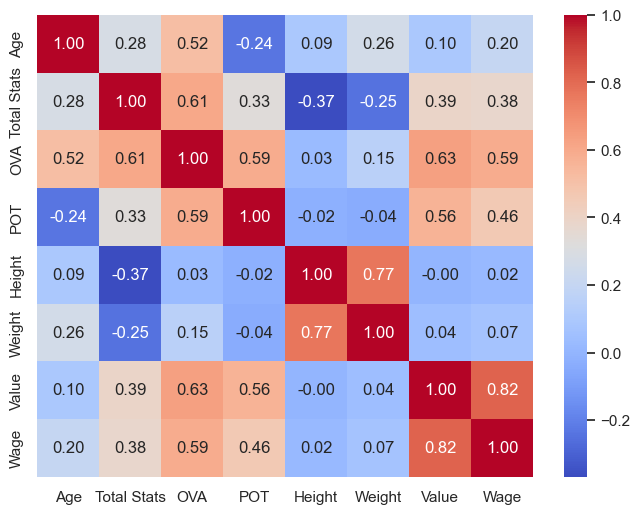

In [46]:
sns.set(font_scale=1)  # Adjust the font size as needed for readability
plt.figure(figsize=(8, 6)) 
sns.heatmap(num_corr, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)

In [47]:
condition = (New_Df_fifa1['OVA'] >= 80) & (New_Df_fifa1['Value'] <= 8000000)
underrated_players = New_Df_fifa1[(New_Df_fifa1['OVA'] >= 80) & (New_Df_fifa1['Value'] <= 8000000)]
underrated_players

,Name,Nationality,Club,Age,BP,Position,Total Stats,OVA,POT,Height,Weight,foot,Value,Wage
4,Iniesta,Spain,Vissel Kobe,36,CAM,CM CAM,2014,81,81,170.18,68.04,Right,5500000,12000
9,P. Scholes,England,Manchester United,37,CAM,CM CDM,2065,80,80,170.18,71.21,Right,400000,40000
12,R. Keane,Republic of Ireland,LA Galaxy,35,CF,ST,1974,80,80,175.26,73.03,Right,5500000,10000
14,O. Kahn,Germany,FC Bayern München,38,GK,GK,1196,87,90,187.96,89.81,Right,0,0
26,G. Buffon,Italy,Juventus,42,GK,GK,1292,82,82,193.04,92.08,Right,2200000,41000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13343,L. Dálves,Uruguay,Uruguay,28,ST,ST CF,1902,80,80,187.96,83.01,Right,0,0
13345,M. Nérez,Uruguay,Uruguay,32,LB,LB LM,2065,80,80,177.80,68.95,Left,0,0
13346,E. Schetino,Uruguay,Uruguay,28,CB,CB,1882,80,80,185.42,79.83,Right,0,0
13347,J. Sildero,Uruguay,Uruguay,28,CAM,CAM RM,2062,80,80,177.80,74.84,Right,0,0


In [48]:
underrated_players.reset_index().drop(columns='index' ,inplace=True)

In [49]:
underrated_players

,Name,Nationality,Club,Age,BP,Position,Total Stats,OVA,POT,Height,Weight,foot,Value,Wage
4,Iniesta,Spain,Vissel Kobe,36,CAM,CM CAM,2014,81,81,170.18,68.04,Right,5500000,12000
9,P. Scholes,England,Manchester United,37,CAM,CM CDM,2065,80,80,170.18,71.21,Right,400000,40000
12,R. Keane,Republic of Ireland,LA Galaxy,35,CF,ST,1974,80,80,175.26,73.03,Right,5500000,10000
14,O. Kahn,Germany,FC Bayern München,38,GK,GK,1196,87,90,187.96,89.81,Right,0,0
26,G. Buffon,Italy,Juventus,42,GK,GK,1292,82,82,193.04,92.08,Right,2200000,41000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13343,L. Dálves,Uruguay,Uruguay,28,ST,ST CF,1902,80,80,187.96,83.01,Right,0,0
13345,M. Nérez,Uruguay,Uruguay,32,LB,LB LM,2065,80,80,177.80,68.95,Left,0,0
13346,E. Schetino,Uruguay,Uruguay,28,CB,CB,1882,80,80,185.42,79.83,Right,0,0
13347,J. Sildero,Uruguay,Uruguay,28,CAM,CAM RM,2062,80,80,177.80,74.84,Right,0,0


In [50]:
underrated_players.sort_values(by='Age')

,Name,Nationality,Club,Age,BP,Position,Total Stats,OVA,POT,Height,Weight,foot,Value,Wage
8950,Welington Dano,Brazil,Brazil,20,LB,LB LM,2068,81,81,177.80,68.95,Left,0,0
1427,B. Ronhaar,Netherlands,Netherlands,23,CF,LW,1603,87,90,180.34,73.94,Left,0,0
8894,Juiano Mestres,Brazil,Brazil,24,CB,CB CDM,2003,81,81,180.34,82.10,Right,0,0
13346,E. Schetino,Uruguay,Uruguay,28,CB,CB,1882,80,80,185.42,79.83,Right,0,0
13347,J. Sildero,Uruguay,Uruguay,28,CAM,CAM RM,2062,80,80,177.80,74.84,Right,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,O. Kahn,Germany,FC Bayern München,38,GK,GK,1196,87,90,187.96,89.81,Right,0,0
170,D. Drogba,Ivory Coast,NaN,38,ST,ST,1956,81,81,187.96,79.83,Right,0,0
239,E. van der Sar,Netherlands,Manchester United,39,GK,GK,1272,83,87,198.12,88.90,Right,0,0
32,F. Totti,Italy,Roma,39,CAM,CF ST,1872,80,80,180.34,82.10,Right,1500000,60000


In [51]:
under_numeric = underrated_players.select_dtypes(include='number')
new_corr = under_numeric.corr()

In [52]:
under_numeric

,Age,Total Stats,OVA,POT,Height,Weight,Value,Wage
4,36,2014,81,81,170.18,68.04,5500000,12000
9,37,2065,80,80,170.18,71.21,400000,40000
12,35,1974,80,80,175.26,73.03,5500000,10000
14,38,1196,87,90,187.96,89.81,0,0
26,42,1292,82,82,193.04,92.08,2200000,41000
...,...,...,...,...,...,...,...,...
13343,28,1902,80,80,187.96,83.01,0,0
13345,32,2065,80,80,177.80,68.95,0,0
13346,28,1882,80,80,185.42,79.83,0,0
13347,28,2062,80,80,177.80,74.84,0,0


Text(0.5, 1.0, 'Heatmap with Annotations')

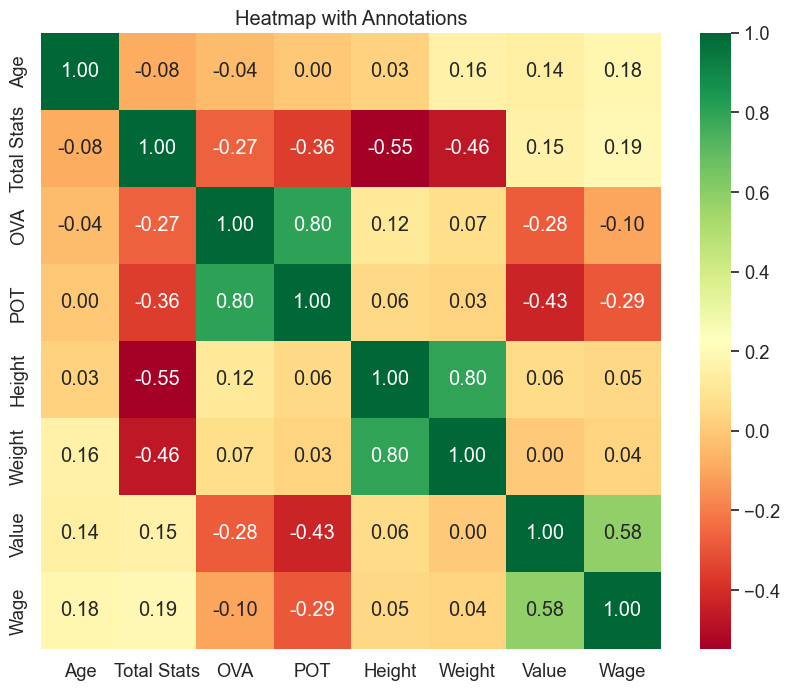

In [53]:
sns.set(font_scale=1.2)  # Adjust the font size as needed for readability
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(new_corr, annot=True, fmt='.2f', cmap='RdYlGn', cbar=True)
plt.title('Heatmap with Annotations')  # Add a title if desired

In [54]:
px.scatter(x=New_Df_fifa1_numeric_drop['POT'], y=New_Df_fifa1_numeric_drop['Value'])

In [55]:
Potential_Value = New_Df_fifa1[['POT', 'Value']]
Potential_Value

,POT,Value
0,69,625000
1,71,600000
2,71,1100000
3,82,0
4,81,5500000
...,...,...
17120,69,550000
17121,66,130000
17122,67,130000
17123,73,475000


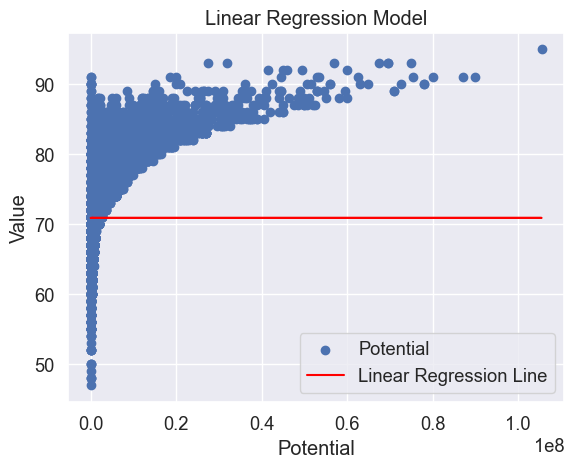

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = Potential_Value.drop('POT', axis=1) 
y = Potential_Value['POT']


model = linear_model.LinearRegression()
result = model.fit(X, y)
regression_line = result.intercept_ + Potential_Value['POT'] * result.coef_

# Plot the original data and the linear regression line
plt.scatter(X, y, label='Potential')
plt.plot(X, regression_line, label='Linear Regression Line', color='red')
plt.xlabel('Potential')
plt.ylabel('Value')
plt.legend()
plt.title('Linear Regression Model')
plt.show()



In [57]:
result.score(X, y)

0.31761113008531383

######Raul Changes on From here on #######################################################################################

In [147]:
condition2 = (New_Df_fifa1['OVA'] >= 75) & (New_Df_fifa1['Value'] <= 2000000) & (New_Df_fifa1['Age'] <= 35)
underrated_players1 = New_Df_fifa1[(New_Df_fifa1['OVA'] >= 75) & (New_Df_fifa1['Value'] <= 2000000) & (New_Df_fifa1['Age'] <= 35)]
underrated_players1

,Name,Nationality,Club,Age,BP,Position,Total Stats,OVA,POT,Height,Weight,foot,Value,Wage
8,G. Neville B,England,Manchester United,35,CB,RB CB RWB,1774,76,82,177.80,78.93,Right,0,0
13,S. Campbell,England,Newcastle United,35,CB,NaN,1581,75,79,187.96,86.18,Right,0,0
27,F. Cannavaro,Italy,Juventus,35,CB,CB,1481,82,89,175.26,74.84,Right,0,0
34,P. Vieira,France,Manchester City,34,CDM,CDM CM,2042,76,87,193.04,82.10,Right,0,0
35,L. Thuram,France,FC Barcelona,35,CB,CB,1540,83,87,185.42,78.93,Right,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13352,D. Pámanes,Uruguay,Uruguay,32,ST,ST CF,1798,75,75,180.34,71.21,Left,0,0
14711,J. Monsario,Ecuador,Ecuador,35,CB,CB,1532,76,76,185.42,83.01,Right,0,0
14712,K. Berlaso,Ecuador,Ecuador,32,RB,RB,2003,77,77,172.72,68.95,Right,0,0
14714,S. Mandíquez,Ecuador,Ecuador,31,ST,ST,1799,80,80,187.96,83.91,Right,0,0


In [148]:
underrated_players1.shape

(104, 14)

In [149]:
px.scatter(x=New_Df_fifa1['Age'], y=New_Df_fifa1['OVA'])

In [140]:
Potential_Value2 = fifa21_male2[['Age','OVA' ]]
Potential_Value2

,Age,OVA
0,33,69
1,37,71
2,33,71
3,36,68
4,36,81
...,...,...
17120,22,64
17121,18,56
17122,18,56
17123,20,62


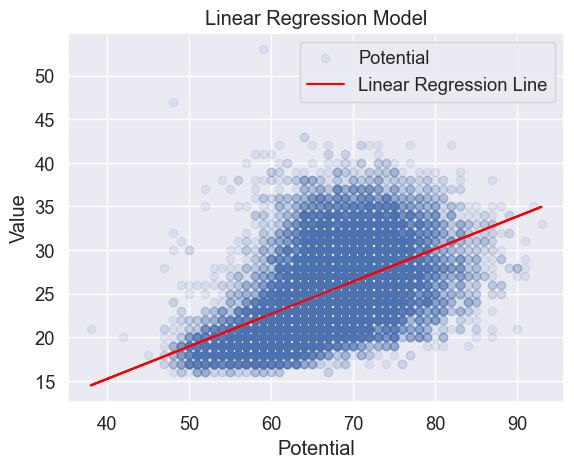

In [141]:
X = Potential_Value2.drop('Age', axis=1) 
y = Potential_Value2['Age']


model = linear_model.LinearRegression()
result1 = model.fit(X, y)
regression_line = result.intercept_ + Potential_Value2['OVA'] * result.coef_

# Plot the original data and the linear regression line
plt.scatter(X, y, label='Potential',alpha=0.1)
plt.plot(X, regression_line, label='Linear Regression Line', color='red')
plt.xlabel('Potential')
plt.ylabel('Value')
plt.legend()
plt.title('Linear Regression Model')
plt.show()


In [142]:
result1.score(X, y)

0.2673913580599989

In [154]:
# Dream Team

dream_team = underrated_players1[['Name', 'Age', 'OVA', 'BP', 'Club']]
dream_team.sort_values(by='Age', inplace=True)

def get_max_overall(group):
    return group[group['OVA'] == max(group['OVA'])]

dream_group = dream_team.groupby('BP').apply(get_max_overall).reset_index(drop=True)
dream_best = dream_group[['Name', 'Club', 'Age', 'BP', 'OVA']]

cm = sns.light_palette("green", as_cmap=True)
style_dream_best = dream_best.style.background_gradient(cmap=cm)

# Display the styled DataFrame
style_dream_best

C:\Users\RaulR\AppData\Local\Temp\ipykernel_32876\2648023516.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Name,Club,Age,BP,OVA
0,J. Sildero,Uruguay,28,CAM,80
1,S. Ardero,Uruguay,32,CAM,80
2,Kaká,nan,35,CAM,80
3,L. Thuram,FC Barcelona,35,CB,83
4,Puyol,FC Barcelona,35,CB,83
5,W. Barrios,Colombia,26,CDM,79
6,E. Riquero,Uruguay,32,CDM,79
7,B. Ronhaar,Netherlands,23,CF,87
8,Santi Cazorla,Spain,35,CM,82
9,J. Serendero,Uruguay,32,GK,80


In [153]:
# Potential Team

Potential_team = underrated_players1[['Name', 'Age', 'POT', 'BP', 'Club']]
Potential_team.sort_values(by='Age', inplace=True)

def get_max_pot(group):
    return group[group['POT'] == group['POT'].max()]

pot_team = Potential_team.groupby('BP').apply(get_max_pot).reset_index(drop=True)
pot_best = pot_team[['Name', 'Club', 'Age', 'BP', 'POT']].rename(columns={'POT': 'Potential'})

cm = sns.light_palette("pink", as_cmap=True)
style_pos_best = pot_best.style.background_gradient(cmap=cm)

# Display the styled DataFrame
style_pos_best

C:\Users\RaulR\AppData\Local\Temp\ipykernel_32876\1192081455.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Name,Club,Age,BP,Potential
0,Ronaldo,Corinthians,33,CAM,91
1,J. Stam,Ajax,34,CB,90
2,P. Vieira,Manchester City,34,CDM,87
3,B. Ronhaar,Netherlands,23,CF,90
4,T. Vilhena,Netherlands,24,CM,82
5,Santi Cazorla,Spain,35,CM,82
6,J. Serendero,Uruguay,32,GK,80
7,Jefferson,Brazil,33,GK,80
8,Sylvinho,Manchester City,35,LB,84
9,Dédé,Borussia Dortmund,32,LM,82
